# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 2 submission</b></u>

### Roster Name: Kyle Louderback
### Student ID: 015331667
### Email address: kyle.louderback@sjsu.edu


##  <u>References and sources </u>

Yulia Newton code sample <br>
https://www.geeksforgeeks.org/ <br>
https://realpython.com/knn-python


##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score
import statistics


In [ ]:
np.random.seed(42)

#### Code the solution

### My Distance Function

In [ ]:
def euclidean_dist(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

### My KNN

In [ ]:
def knn(test_row, train, num_neighbors):
	distances = list()
	for i in range(len(train.index)):
		dist = euclidean_dist(test_row, train.iloc[i][:-1])
		distances.append((train.iloc[i], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
		#print("hello-> ",distances[i][1])
	return neighbors

### 2-D Data

In [ ]:
n = 100

X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))
Y1 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

X2 = np.random.normal(loc= 2.0, scale=2.0, size=int(n/2))
Y2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

In [ ]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
dt = pd.DataFrame({'X':X, 'Y':Y}, columns=['X', 'Y'])
dt.head()

,X,Y
0,-1.006572,0.324084
1,-2.276529,-0.385082
2,-0.704623,-0.676922
3,1.046060,0.611676
4,-2.468307,1.031000


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

,X,Y
43,-2.602207,-0.327662
62,2.120460,1.158596
3,1.046060,0.611676
71,0.181225,-0.815810
45,-3.439688,-1.463515


In [ ]:
for i in range(len(X_test)):
  knn(X_test.iloc[i],X_train,3)

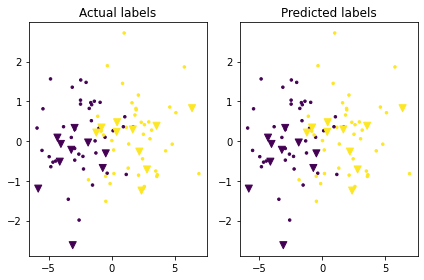

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

### 3-D Data

In [ ]:
n = 1001 #data points


A1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
B1 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))
C1 = np.random.normal(loc=-1.0, scale=1.0, size=int(n/4))

A2 = np.random.normal(loc= 0.0, scale=3.0, size=int(n/4))
B2 = np.random.normal(loc=1.0, scale= 2.0, size=int(n/4))
C2 = np.random.normal(loc=1, scale=1.0, size=int(n/4))

A3 = np.random.normal(loc= 0.0, scale=3.0, size=int(n/4))
B3 = np.random.normal(loc=3.0, scale=1.0, size=int(n/4))
C3 = np.random.normal(loc=4.0, scale=1.0, size=int(n/4))

A4 = np.random.normal(loc= 0.0, scale=3.0, size=int(n/4))
B4 = np.random.normal(loc=5.0, scale=3.0, size=int(n/4))
C4 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))

A = np.concatenate((A1, A2, A3,A4), axis=0)
B = np.concatenate((B1, B2, B3,B4), axis=0)
C = np.concatenate((C1, C2, C3,C4), axis=0)

In [ ]:
la1 = [0]*int(n/3)
la2 = [1]*int(n/3)
la3 = [2]*int(n/3+1)

labels3d = la1+la2+la3
print(labels3d)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
dt3 = pd.DataFrame({'A':A, 'B':B, 'C':C}, columns=['A', 'B','C'])
dt3.head()

,A,B,C
0,1.073362,-3.062679,-1.522723
1,1.682354,-2.044858,0.049009
2,3.249154,-3.985726,-1.704344
3,3.161406,-2.495953,-2.408461
4,-4.133008,-3.530258,-2.556629


### Split 3-D Data

In [ ]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(dt3,labels3d, test_size=0.2, random_state=0)
X_train3.head()

,A,B,C
687,1.272183,4.549020,3.075767
500,1.051890,1.226968,5.804348
332,1.197669,2.416217,1.323168
979,-0.790345,7.956349,-2.484372
817,-6.657901,6.364223,-5.832156


In [ ]:
for i in range(len(X_test3)):
  knn(X_test3.iloc[i],X_train3,3)